In [1]:
%matplotlib inline
import pyNN.spiNNaker as sim
from omnigloter import neuron_model as __neuron__
import time
import numpy as np
import matplotlib.pyplot as plt

def plot_spiketrains(segment, color=None):
    for spiketrain in segment.spiketrains:
        y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
        plt.plot(spiketrain, y, '|', color=color)
        plt.ylabel(segment.name)
#         plt.setp(plt.gca().get_xticklabels(), visible=False)

Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:
t_creation_start = time.time()
fname = './L2L-OMNIGLOT/input_spikes_Latin__width_56_div_3__nclass_14__nepoch_0100__totalsamples_0000022456.npz'
data = np.load(fname, allow_pickle=True)
labels=data['labels']
shapes=data['shapes'].item()
spikes=data['spikes'].item()

total_t_creation = time.time() - t_creation_start
hours = total_t_creation // 3600
minutes = (total_t_creation - hours * 3600) // 60
seconds = total_t_creation - hours * 3600 - minutes * 60
print("\tIt took %d:%d:%05.2f" % (hours, minutes, seconds))
print(shapes)
print(labels)
print(len(spikes))


	It took 0:0:01.59
{0: [56, 56], 1: [56, 56], 2: [19, 12], 3: [19, 12]}
[ 2 10  1 ...  6 14 13]
4


In [3]:
def split_ssa(ssa, n_steps, duration):
    dt = duration // n_steps
    s = {}
    for st in range(0, duration, dt):
        et = st + dt
        s[st] = {}
        for i in ssa:
            s[st][i] = []
            for times in ssa[i]:
                ts = np.asarray(times)
                whr = np.where(np.logical_and(st <= ts, ts < et))
                s[st][i].append(ts[whr].tolist())
            
    return s
            
stepped_spikes = split_ssa(spikes, 100, 1122800)
start_times = sorted(stepped_spikes.keys())
dt = start_times[1] - start_times[0]

In [4]:
ssa_counts = {}
layer_counts = {i: [] for i in range(4)}
ssa_totals = []

for st in stepped_spikes:
    ssa = stepped_spikes[st]
    ssa_counts[st] = {}
    _total = 0
    for layer in ssa:
        count = np.sum([1 if len(times) else 0 for times in ssa[layer]])
        ssa_counts[st][layer] = count
        layer_counts[layer].append(count)
        _total += count
    ssa_totals.append(_total)


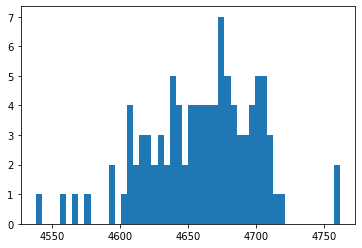

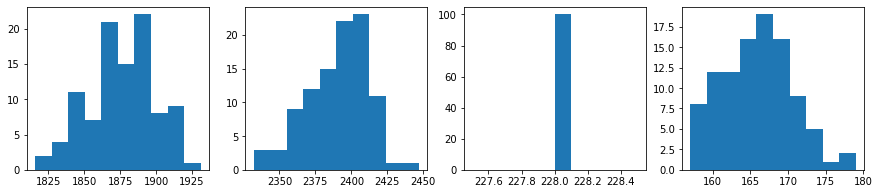

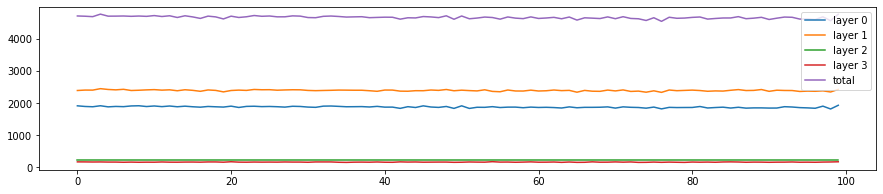

In [5]:
plt.figure()
plt.hist(ssa_totals, bins=50)
plt.show()


plt.figure(figsize=(15, 3))
for i in layer_counts:
    plt.subplot(1, 4, i+1)
    plt.hist(layer_counts[i])
plt.show()

plt.figure(figsize=(15, 3))
for i in layer_counts:
    plt.plot(layer_counts[i], label="layer %d"%i)
plt.plot(ssa_totals, label="total")
plt.legend()
plt.show()

        

In [6]:
timestep = 0.1#.0
min_delay = timestep
# sim.reset()
sim.setup(timestep, min_delay,)


sim.set_number_of_neurons_per_core(__neuron__.IF_curr_exp_i, 150)
sim.set_number_of_neurons_per_core(sim.SpikeSourceArray, 250)

ins = {}
for i in spikes:
    s = len(spikes[i])
    p = sim.Population(s, sim.SpikeSourceArray,
           {'spike_times': stepped_spikes[start_times[0]][i]}, label='input layer %s'%i)

#     p.record('spikes')
    ins[i] = p


2020-01-14 13:35:31 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2020-01-14 13:35:31 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker8NewModelTemplate/python_models8/model_binaries
2020-01-14 13:35:31 WARNING: /home/jovyan/l2l-omniglot/reports has 6 old reports that have not been closed
2020-01-14 13:35:31 WARNING: /home/jovyan/l2l-omniglot/application_generated_data_files has 6 old reports that have not been closed
2020-01-14 13:35:31 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFacto

['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


In [7]:
run = 0
start_t = 0
print("\n\n\n run %s\tstart %s\n\n"%(run, start_t))

sim.run(dt)
# print(time.time())
# time.sleep(10)
# print(time.time())

# for run in range(1, len(start_times)):
#     start_t = start_times[run]
#     print("\n\n\n run %s\tstart %s\n\n"%(run, start_t))
    
#     for i in spikes:
#         ins[i].spike_times = stepped_spikes[start_t][i]

#     sim.run(dt)


# data = {i: ins[i].get_data() for i in ins}
# sim.end()

2020-01-14 13:35:35 INFO: Starting execution process
2020-01-14 13:35:35 INFO: Simulating for 112280 0.1ms timesteps using a hardware timestep of 10us





 run 0	start 0




2020-01-14 13:35:38 INFO: Time 0:00:03.269499 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-01-14 13:35:47 INFO: Time 0:00:09.346160 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-01-14 13:35:53 INFO: Time 0:00:05.275842 taken by PartitionAndPlacePartitioner
Created spalloc job 5242925
2020-01-14 13:35:53 INFO: Created spalloc job 5242925
Waiting for board power commands to complete.
2020-01-14 13:35:53 INFO: Waiting for board power commands to complete.
2020-01-14 13:36:01 INFO: Time 0:00:08.943726 taken by SpallocAllocator
2020-01-14 13:36:01 INFO: Creating transceiver for 10.11.209.1
2020-01-14 13:36:01 INFO: Working out if machine is booted
2020-01-14 13:36:05 INFO: Attempting to 

2020-01-14 13:36:14 INFO: Time 0:00:00.151187 taken by HostExecuteSystemDataSpecification
Loading system executables onto the machine
|0%                          50%                         100%|
2020-01-14 13:36:20 INFO: Time 0:00:05.746005 taken by LoadSystemExecutableImages
Clearing tags
|0%                          50%                         100%|
Loading Tags
|0%                          50%                         100%|
2020-01-14 13:36:20 INFO: Time 0:00:00.020116 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2020-01-14 13:36:20 INFO: Time 0:00:00.048301 taken by WriteMemoryIOData
Executing data specifications and loading data for application vertices
|0%                          50%                         100%|
2020-01-14 13:36:20 INFO: Time 0:00:00.241202 taken by HostExecuteApplicationDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2020-01-14 13:36:21 INFO: Time 0:00:00.54

11228.0

In [ ]:
for run in range(1, len(start_times)):
    start_t = start_times[run]
    print("\n\n\n run %s\tstart %s\n\n"%(run, start_t))
    
    for i in spikes:
        ins[i].set(spike_times=stepped_spikes[start_t][i])

    sim.run(dt)


# data = {i: ins[i].get_data() for i in ins}
# sim.end()

2020-01-14 13:38:31 INFO: Starting execution process
2020-01-14 13:38:31 INFO: Simulating for 112280 0.1ms timesteps using a hardware timestep of 10us
2020-01-14 13:38:31 INFO: Running for 1 steps for a total of 11228.0ms
2020-01-14 13:38:31 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|




 run 1	start 11228




2020-01-14 13:38:32 INFO: Time 0:00:01.235336 taken by SdramUsageReportPerChip
clearing IOBUF from the machine
|0%                          50%                         100%|
2020-01-14 13:38:32 INFO: Time 0:00:00.022999 taken by ChipIOBufClearer
Reloading data
|0%                          50%                         100%|
2020-01-14 13:38:32 INFO: Time 0:00:00.036208 taken by DSGRegionReloader
Updating run time
|0%                          50%                         100%|
2020-01-14 13:38:32 INFO: Time 0:00:00.039664 taken by ChipRuntimeUpdater
2020-01-14 13:38:32 INFO: ** Notifying external sources that the database is ready for reading **
2020-01-14 13:38:32 INFO: Time 0:00:00.006576 taken by NotificationProtocol
2020-01-14 13:38:32 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-01-14 13:38:32 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-01-14 




 run 2	start 22456




2020-01-14 13:40:27 INFO: Time 0:00:01.805596 taken by SdramUsageReportPerChip
clearing IOBUF from the machine
|0%                          50%                         100%|
2020-01-14 13:40:27 INFO: Time 0:00:00.024264 taken by ChipIOBufClearer
Reloading data
|0%                          50%                         100%|
2020-01-14 13:40:27 INFO: Time 0:00:00.037306 taken by DSGRegionReloader
Updating run time
|0%                          50%                         100%|
2020-01-14 13:40:27 INFO: Time 0:00:00.043209 taken by ChipRuntimeUpdater
2020-01-14 13:40:27 INFO: ** Notifying external sources that the database is ready for reading **
2020-01-14 13:40:27 INFO: Time 0:00:00.001223 taken by NotificationProtocol
2020-01-14 13:40:27 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-01-14 13:40:27 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-01-14 




 run 3	start 33684




2020-01-14 13:42:22 INFO: Time 0:00:02.375783 taken by SdramUsageReportPerChip
clearing IOBUF from the machine
|0%                          50%                         100%|
2020-01-14 13:42:22 INFO: Time 0:00:00.024667 taken by ChipIOBufClearer
Reloading data
|0%                          50%                         100%|
2020-01-14 13:42:22 INFO: Time 0:00:00.044055 taken by DSGRegionReloader
Updating run time
|0%                          50%                         100%|
2020-01-14 13:42:22 INFO: Time 0:00:00.041047 taken by ChipRuntimeUpdater
2020-01-14 13:42:22 INFO: ** Notifying external sources that the database is ready for reading **
2020-01-14 13:42:22 INFO: Time 0:00:00.000888 taken by NotificationProtocol
2020-01-14 13:42:22 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-01-14 13:42:22 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-01-14 

In [10]:
sim.end()

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If 

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expe

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:500:749.  If you ex

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:0:249.  If yo

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 2:0:227

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2750:

2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:2250:24

Provenance from run 0


2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:45 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  I

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:24

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999. 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expe

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  I

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  I

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2250:24

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1750:1999. 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expe

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:250:499.  If you 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 2:0:227

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2750:

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:2250:24

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1750:1999. 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If 

2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:46 WARNING: No multicast packets were sent by input layer 1:750:999.  If 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:250:499. 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expe

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:500:749.  If you ex

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 2:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 3:0:227.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:0:249.  If yo

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 2:0:227

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2750:

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:2250:24

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1750:1999. 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:750:999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:1250:1499.  If 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:250:499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:500:749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:750:999.  If 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:3135.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:0:249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 1:250:499. 

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:2749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2750:2999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:3000:

2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1000:1249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1250:1499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1500:1749.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:1750:1999.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2000:2249.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2250:2499.  If you expected packets to be sent this could indicate an error
2020-01-14 13:21:47 WARNING: No multicast packets were sent by input layer 0:2500:

In [9]:
for i in data:
    plt.figure()
    plot_spiketrains(data[i].segments[0], color='blue')
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'segments'

<Figure size 432x288 with 0 Axes>